#Senior Vision Researcher Exercise - Michael Roitman
getting files from repo to run on colab

In [1]:
!git clone https://github.com/roitmaster/clip-tagger.git

Cloning into 'clip-tagger'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 28 (delta 12), reused 20 (delta 6), pack-reused 0 (from 0)
Receiving objects: 100% (28/28), 729.24 KiB | 10.88 MiB/s, done.
Resolving deltas: 100% (12/12), done.


## Install python packages and getting some images from kaggle to work with

In [2]:
!cp clip-tagger/tagger.py .
!pip install -r ./clip-tagger/requirements.txt --quiet

# Download the dataset
!kaggle datasets download -d ultralytics/coco128

# Unzip the dataset
!unzip -qq coco128.zip

# copy the images and removing the rest
!mkdir images
!mv coco128/images/train2017/*.jpg images/
!rm -rf coco128*

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.6 MB/s eta 0:00:00
Dataset URL: https://www.kaggle.com/datasets/ultralytics/coco128
License(s): GNU Affero General Public License 3.0
  0% 0.00/6.66M [00:00<?, ?B/s]
100% 6.66M/6.66M [00:00<00:00, 76.1MB/s]


## import the code and the packages

In [3]:
from tagger import Tagger, create_labels, optimize_model
import cv2
import matplotlib.pyplot as plt
from glob import glob

# setting up the parameters of the tag_dict and loading the images

In [4]:
images_path = glob("images/*.jpg")

tag_dict = {
    "Animals": [
        "dog", "cat", "elephant", "giraffe", "bird", "bear", "zebra", "lizard",
        "horse", "stuffed animals", "fish", "butterfly"
    ],
    "Sports": [
        "baseball", "tennis", "soccer", "snowboard", "skiing", "skateboarding",
        "flying", "kite", "swimming"
    ],
    "Living Beings": [
        "animals", "people", "children", "man", "woman"
    ],
    "Activities & Actions": [
        "sports", "playing", "eating", "drinking", "sitting", "standing",
        "walking", "riding", "sleeping"
    ],
    "Food": [
        "drink", "pizza", "cake", "sandwich"
    ],
    "Drink": [
        "coffee", "juice", "wine"
    ],
    "Places": [
        "natural settings", "urban", "beach", "field", "park", "river",
        "city", "street", "house", "room", "kitchen"
    ],
    "Objects": [
        "furniture", "vehicles", "electronics", "sports equipment", "clock",
        "table", "chair", "couch", "bed", "bicycle", "car"
    ],
    "Nature & Weather": [
        "nature", "trees", "flowers", "grass", "sunset", "snow", "sunny", "cloudy"
    ],
    "Colors": [
        "red", "white", "yellow", "green", "blue"
    ],
    "Time & Season": [
        "morning", "afternoon", "night", "seasonal", "summer", "winter"
    ],
    "Location": [
        "indoor", "outdoor"
    ]
}

np_images = [cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB) for image_path in images_path]



## Running the Tagger


In [5]:
tagger = Tagger(tag_dict)
tags_part1 = tagger(np_images, threshold=0.7)

100%|███████████████████████████████████████| 338M/338M [00:03<00:00, 94.2MiB/s]


## Show the part 1 results

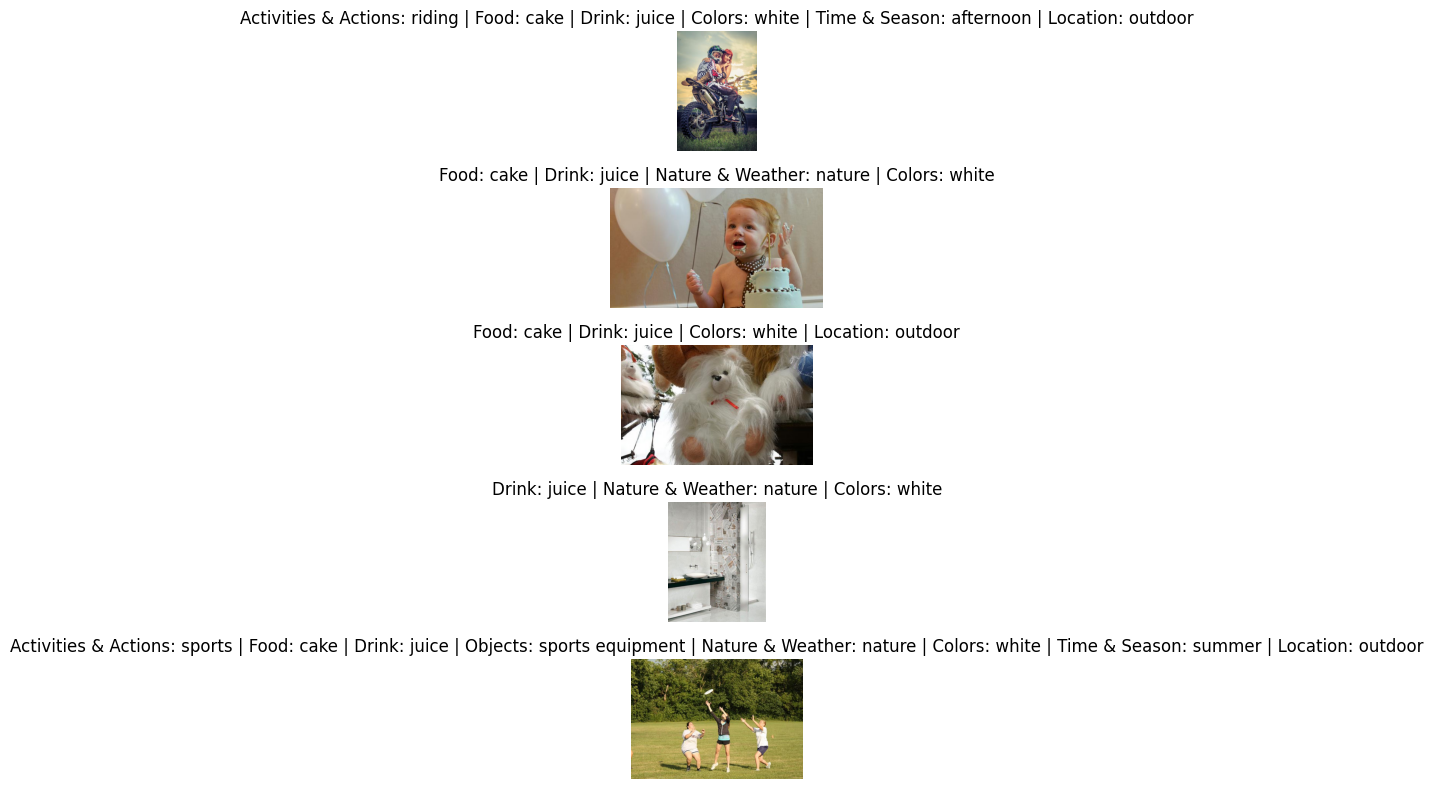

In [6]:
# Define the number of rows and columns for the plot grid
rows = 5
cols = 1

# Create a figure with a specified grid layout and figure size
fig, axs = plt.subplots(rows, cols, figsize=(15, 8))

# Loop through the first 5 images and their associated tags
for i in range(5):
    # Retrieve the image and the tags for the current index
    image = np_images[i]
    tags = tags_part1[i]

    # Extract only the tag names from the tags dictionary for display
    tags = {category: tag["tag"] for category, tag in tags.items()}

    # Create a title by joining categories and tags as strings, separated by "|"
    title = " | ".join([f"{category}: {tag}" for category, tag in tags.items()])

    # Display the image in the subplot and set the title with tag information
    axs[i].imshow(image)
    axs[i].set_title(title)
    axs[i].axis('off')  # Hide axes for a cleaner look

# Adjust layout to avoid overlapping and display the plot
plt.tight_layout()
plt.show()

# Part 2 - optimization
## showing the result before optimization

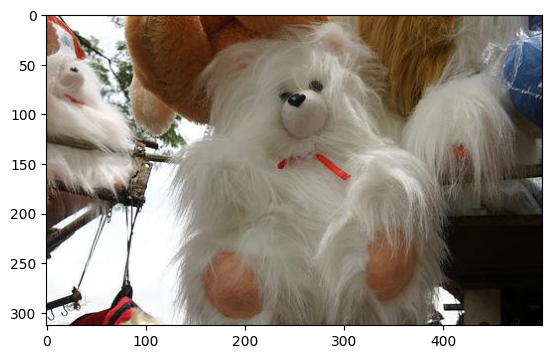

{'Food': {'tag': 'cake', 'score': 0.9295928478240967, 'index': 2}, 'Drink': {'tag': 'juice', 'score': 0.8153276443481445, 'index': 1}, 'Colors': {'tag': 'white', 'score': 0.9735645651817322, 'index': 1}, 'Location': {'tag': 'outdoor', 'score': 0.929412305355072, 'index': 1}}


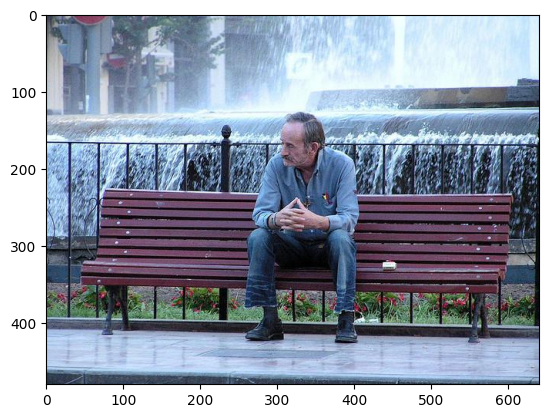

{'Food': {'tag': 'cake', 'score': 0.8867753744125366, 'index': 2}, 'Nature & Weather': {'tag': 'nature', 'score': 0.8911741375923157, 'index': 0}, 'Colors': {'tag': 'white', 'score': 0.9451317191123962, 'index': 1}, 'Time & Season': {'tag': 'afternoon', 'score': 0.7459447383880615, 'index': 1}, 'Location': {'tag': 'outdoor', 'score': 0.993641197681427, 'index': 1}}


In [7]:
#seen image
result = tagger(np_images, threshold=0.7)
plt.imshow(np_images[2])
plt.show()
plt.pause(0.01)
print(result[2])

#unseen image
plt.imshow(np_images[-1])
plt.show()
plt.pause(0.01)
print(result[-1])

# running the optimization on a train set 123 image

In [8]:
from tagger import Tagger, create_labels, optimize_model

In [9]:
subset_images = np_images[:123]
subset_labels = create_labels(tagger, subset_images, threshold=0.7)
optimize_model(tagger, subset_images, subset_labels, lr=1e-3, epochs=50, print_every=1)

Epoch: 0, Loss: 6.804345369338989
Epoch: 1, Loss: 5.100426912307739
Epoch: 2, Loss: 3.9970099925994873
Epoch: 3, Loss: 3.2244839668273926
Epoch: 4, Loss: 2.671214461326599
Epoch: 5, Loss: 2.263376832008362
Epoch: 6, Loss: 1.9534342885017395
Epoch: 7, Loss: 1.711314857006073
Epoch: 8, Loss: 1.5178718268871307
Epoch: 9, Loss: 1.3605517745018005
Epoch: 10, Loss: 1.2307479977607727
Epoch: 11, Loss: 1.1222734451293945
Epoch: 12, Loss: 1.0305309295654297
Epoch: 13, Loss: 0.9520418047904968
Epoch: 14, Loss: 0.8841535151004791
Epoch: 15, Loss: 0.8248392939567566
Epoch: 16, Loss: 0.7725415676832199
Epoch: 17, Loss: 0.726055458188057
Epoch: 18, Loss: 0.6844372004270554
Epoch: 19, Loss: 0.6469394415616989
Epoch: 20, Loss: 0.6129645630717278
Epoch: 21, Loss: 0.5820283591747284
Epoch: 22, Loss: 0.5537348836660385
Epoch: 23, Loss: 0.5277550518512726
Epoch: 24, Loss: 0.5038160607218742
Epoch: 25, Loss: 0.4816870167851448
Epoch: 26, Loss: 0.46117180585861206
Epoch: 27, Loss: 0.44210318475961685
Epoch:

## Compare result

seen image


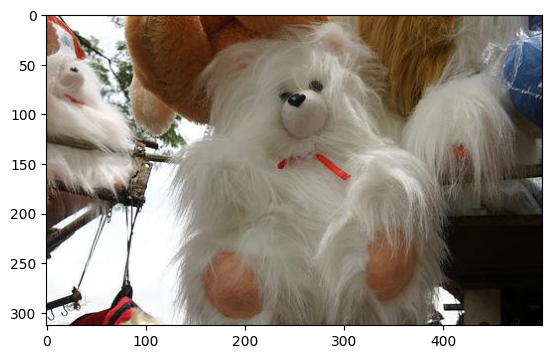

results before optimization
{'Food': {'tag': 'cake', 'score': 0.9295928478240967, 'index': 2}, 'Drink': {'tag': 'juice', 'score': 0.8153276443481445, 'index': 1}, 'Colors': {'tag': 'white', 'score': 0.9735645651817322, 'index': 1}, 'Location': {'tag': 'outdoor', 'score': 0.929412305355072, 'index': 1}}
results after optimization
{'Animals': {'tag': 'dog', 'score': 0.8480210304260254, 'index': 0}, 'Sports': {'tag': 'flying', 'score': 0.9105461835861206, 'index': 6}, 'Living Beings': {'tag': 'animals', 'score': 0.8286685347557068, 'index': 0}, 'Food': {'tag': 'cake', 'score': 0.9991183876991272, 'index': 2}, 'Drink': {'tag': 'juice', 'score': 0.9990078806877136, 'index': 1}, 'Places': {'tag': 'natural settings', 'score': 0.7517795562744141, 'index': 0}, 'Objects': {'tag': 'bed', 'score': 0.8573446273803711, 'index': 8}, 'Nature & Weather': {'tag': 'nature', 'score': 0.9710829854011536, 'index': 0}, 'Colors': {'tag': 'white', 'score': 0.998197615146637, 'index': 1}, 'Time & Season': {'tag

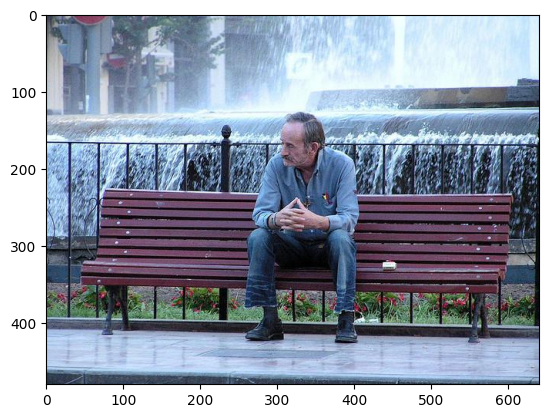

results before optimization
{'Food': {'tag': 'cake', 'score': 0.8867753744125366, 'index': 2}, 'Nature & Weather': {'tag': 'nature', 'score': 0.8911741375923157, 'index': 0}, 'Colors': {'tag': 'white', 'score': 0.9451317191123962, 'index': 1}, 'Time & Season': {'tag': 'afternoon', 'score': 0.7459447383880615, 'index': 1}, 'Location': {'tag': 'outdoor', 'score': 0.993641197681427, 'index': 1}}
results after optimization
{'Sports': {'tag': 'flying', 'score': 0.8648802638053894, 'index': 6}, 'Food': {'tag': 'cake', 'score': 0.9886117577552795, 'index': 2}, 'Drink': {'tag': 'juice', 'score': 0.9693655371665955, 'index': 1}, 'Nature & Weather': {'tag': 'nature', 'score': 0.9885134100914001, 'index': 0}, 'Colors': {'tag': 'white', 'score': 0.9970676302909851, 'index': 1}, 'Time & Season': {'tag': 'afternoon', 'score': 0.9672592282295227, 'index': 1}, 'Location': {'tag': 'outdoor', 'score': 0.9978825449943542, 'index': 1}}


In [13]:
#seen image
print("seen image")

result2 = tagger(np_images, threshold=0.7)
plt.imshow(np_images[2])
plt.show()
plt.pause(0.01)
print("results before optimization")
print(result[2])
print("results after optimization")
print(result2[2])


#unseen image
print()
print("unseen image")
plt.imshow(np_images[-1])
plt.show()
plt.pause(0.01)
print("results before optimization")
print(result[-1])
print("results after optimization")
print(result2[-1])